In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [2]:

df = pd.read_csv('chart.csv')

total_messages_per_minute = df.groupby('time_in_minutes').size().reset_index(name='message_count')

member_messages_per_minute = df[df['author_title'] == 'Member'].groupby('time_in_minutes').size().reset_index(name='message_count')

display(total_messages_per_minute.head())
member_messages_per_minute.head()

,time_in_minutes,message_count
0,0,65
1,1,76
2,2,36
3,3,40
4,4,32


,time_in_minutes,message_count
0,0,41
1,1,45
2,2,26
3,3,34
4,4,21


In [3]:
time_labels = pd.to_datetime(total_messages_per_minute['time_in_minutes'], unit='m').dt.strftime('%H:%M')

time_labels_10min = time_labels[::10]
minutes_10min = total_messages_per_minute['time_in_minutes'][::10]
display(minutes_10min.head())
time_labels_10min.head()

0      0
10    10
20    20
30    30
40    40
Name: time_in_minutes, dtype: int64

0     00:00
10    00:10
20    00:20
30    00:30
40    00:40
Name: time_in_minutes, dtype: object

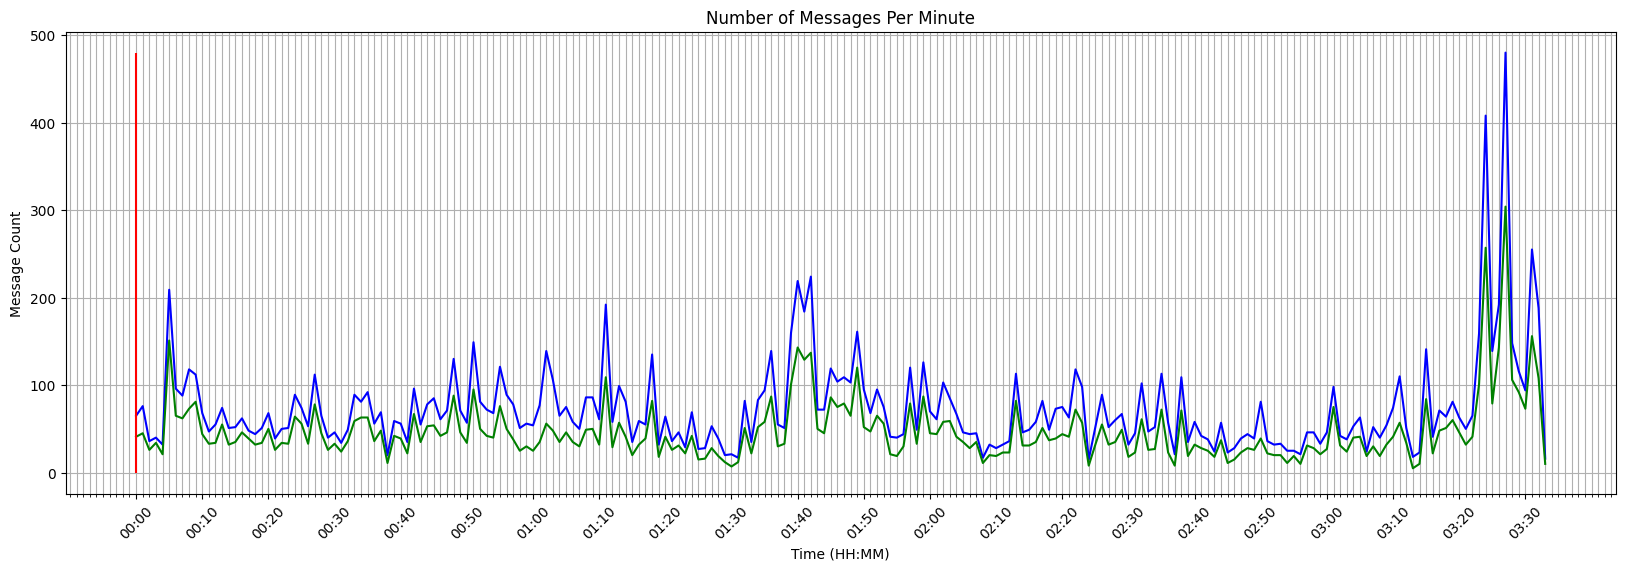

In [4]:
plt.figure(figsize=(20, 6))

plt.plot(total_messages_per_minute['time_in_minutes'], total_messages_per_minute['message_count'], label='Total Messages', color='blue')

plt.plot(member_messages_per_minute['time_in_minutes'], member_messages_per_minute['message_count'], label='Member Messages', color='green')


plt.vlines(0, ymin=0, ymax=total_messages_per_minute['message_count'].max(), colors='red')

plt.xticks(ticks=minutes_10min, labels=time_labels_10min, rotation=45)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.xlabel('Time (HH:MM)')
plt.ylabel('Message Count')
plt.title('Number of Messages Per Minute')

plt.grid(True, which='both')
plt.show()